In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
df=pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [14]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [20]:
Model=Sequential()

Model.add(Dense(10,activation="tanh",input_dim=2,kernel_initializer='glorot_normal',))
Model.add(Dense(10,activation="tanh",kernel_initializer='glorot_normal'))
Model.add(Dense(10,activation="tanh",kernel_initializer='glorot_normal'))
Model.add(Dense(10,activation="tanh",kernel_initializer='glorot_normal'))

Model.add(Dense(1,activation="sigmoid"))

Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Model.summary()

history=Model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7062 - loss: 0.6360 - val_accuracy: 0.4000 - val_loss: 0.6960
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8077 - loss: 0.5828 - val_accuracy: 0.4000 - val_loss: 0.7194
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8556 - loss: 0.5305 - val_accuracy: 0.4000 - val_loss: 0.7507
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8562 - loss: 0.4867 - val_accuracy: 0.4000 - val_loss: 0.7816
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8466 - loss: 0.4658 - val_accuracy: 0.4000 - val_loss: 0.8201
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8251 - loss: 0.4603 - val_accuracy: 0.4000 - val_loss: 0.8595
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8571 - loss: 0.4102 - val_accuracy: 0.4000 - val_loss: 0.9093
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8569 - loss: 0.3852 - val_accuracy: 0.4000 - 

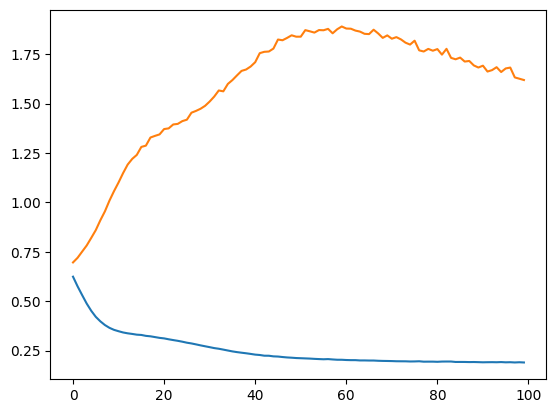

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [23]:
#now work with he_normal 
Models=Sequential()

Models.add(Dense(10,activation="relu",input_dim=2,kernel_initializer='he_normal',))
Models.add(Dense(10,activation="relu",kernel_initializer='he_normal'))
Models.add(Dense(10,activation="relu",kernel_initializer='he_normal'))
Models.add(Dense(10,activation="relu",kernel_initializer='he_normal'))

Models.add(Dense(1,activation="sigmoid"))

Models.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Models.summary()

history=Models.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5307 - loss: 0.7085 - val_accuracy: 0.4000 - val_loss: 2754.3557
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6932 - loss: 0.6563 - val_accuracy: 0.4000 - val_loss: 3502.1602
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7225 - loss: 0.6165 - val_accuracy: 0.4000 - val_loss: 4134.7881
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8315 - loss: 0.5659 - val_accuracy: 0.4000 - val_loss: 5129.4131
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8256 - loss: 0.5433 - val_accuracy: 0.4000 - val_loss: 5991.2915
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7965 - loss: 0.5156 - val_accuracy: 0.4000 - val_loss: 8001.7725
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7982 - loss: 0.4792 - val_accuracy: 0.4000 - val_loss: 10497.6299
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8075 - loss: 0.4512 - v

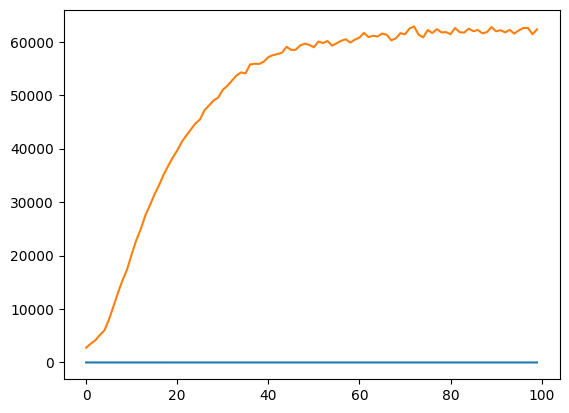

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [25]:
Model.get_weights()

[array([[ 0.37418494,  0.5133581 , -0.31905842,  0.07182638, -0.62764966,
         -0.15064402, -0.0778223 , -0.3449062 , -0.8850265 , -0.15895304],
        [-0.6359894 , -0.39081082,  0.4074028 ,  0.6379626 ,  1.0445813 ,
         -0.23795792, -0.6696304 , -0.2029067 , -0.3053607 , -0.6439865 ]],
       dtype=float32),
 array([-0.28328145, -0.18352526,  0.16584326, -0.23320873, -0.36236706,
         0.05713478,  0.20543164,  0.01188443, -0.13114044, -0.17191444],
       dtype=float32),
 array([[ 0.6202516 , -0.33616924,  0.56322974,  0.01424602,  0.02781298,
          0.4498685 , -0.02122298,  0.26598743,  0.3956451 , -0.4010771 ],
        [-0.04448102,  0.10877974,  0.31826445, -0.23507127, -0.67262626,
         -0.24478152,  0.05365888,  0.07299831,  0.5801197 , -0.14264075],
        [-0.06457206,  0.05497206, -0.02750175,  0.6650267 , -0.04333397,
         -0.6958032 , -0.5991631 , -0.39588976, -0.4234351 ,  0.06263477],
        [-0.07170065, -0.08937814, -0.546827  ,  0.07799018, 

In [29]:
Models.get_weights()

[-0.11056483,
 array([[-0.7582787 ,  1.8404303 , -1.7825326 , -0.5564335 , -0.66475964,
          2.1194355 ,  1.1211067 ,  0.10693166,  0.19283944, -0.5807495 ],
        [-0.04938417,  0.3297491 ,  0.53202605,  0.12384703, -0.8899027 ,
         -1.0774766 ,  0.98137194,  0.445703  ,  0.7909204 , -0.4546314 ]],
       dtype=float32),
 array([-0.01999368, -0.06067211, -0.04597154,  0.06697951,  0.21213259,
        -0.14345314,  0.29216388,  0.03423731, -0.03074604,  0.09563664],
       dtype=float32),
 array([[-0.19211464,  0.4070613 ,  0.6291927 , -0.8231652 , -0.10546759,
          0.51446474,  0.2562127 , -1.1450188 , -0.50547355,  0.2764512 ],
        [-0.39941064, -0.20287892,  0.3523908 , -0.17434905, -0.18062034,
          0.36740693,  0.4612742 , -0.4659624 ,  1.0623202 , -0.09148182],
        [ 0.6666185 ,  0.4394496 , -0.0406954 ,  0.83166844, -0.02252063,
         -0.2420178 ,  0.36802006,  0.16215502, -0.09698453, -0.28450102],
        [-0.3226181 ,  0.6020032 , -0.6306005 ,